
# Exploratory Data Analysis (EDA)  of   PEA03 - Annual Population Change Component


Notebook provides an exploratory data analysis (EDA) of the PEA05  The complete series of datasets can be found at
[Central Statistics Office in Ireland  population of Ireland,](https://data.cso.ie/product/pme)

Run the following Jupyter Notebooks in order to generate data for consolidation and machine learning.


| ipynb   | Description               | Status |
| ------ | ------------------------- | ------ |
| PEA01  | Population Estimates      | EDAed       |
| PEA03  | Flow                      |        |
| PEA04  | Region                    |        |
| PEA11  | Single                    |        |
| PEA15  | Component                 | EDAed       |
| PEA18  | Origin/Destination        |        |
| PEA23  | Citizenship Emigration    |        |
| PEA24  | Citizenship Immigration   |        |
| PEA25  | Citizenship Population    |        |

Click on the image to explore reconfigure the data at source.

<a href="https://data.cso.ie/table/PEA03">
    <img src="../screens/pea03.png" alt="Example Image" width="600"/>
</a>





## Data Loading Data Libraries and Functions



In [1]:
import pandas as pd
import altair as alt
# Enable the VegaFusion data transformer
alt.data_transformers.enable('vegafusion')
import matplotlib.pyplot as plt
# Adjusting default font sizes for all plots
plt.rcParams['axes.titlesize'] = 16   # For title
plt.rcParams['axes.labelsize'] = 16   # For x and y labels
plt.rcParams['xtick.labelsize'] = 12  # For x-axis tick labels
plt.rcParams['ytick.labelsize'] = 12  # For y-axis tick labels
import seaborn as sns
import os
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

%matplotlib inline


In [2]:
# Load the dataset
file_path = '../raw/PEA03.csv'
df = pd.read_csv(file_path)

In [3]:
# Preview top 5 rows
df.head() # Note examples of missing population change data in top few rows

,STATISTIC Label,Year,Age Group,Sex,Inward or Outward Flow,UNIT,VALUE
0,Estimated Migration (Persons in April),1987,All ages,Both sexes,Net migration,Thousand,-23.0
1,Estimated Migration (Persons in April),1987,All ages,Both sexes,Emigrants: All destinations,Thousand,40.2
2,Estimated Migration (Persons in April),1987,All ages,Both sexes,Immigrants: All origins,Thousand,17.2
3,Estimated Migration (Persons in April),1987,All ages,Male,Net migration,Thousand,NaN
4,Estimated Migration (Persons in April),1987,All ages,Male,Emigrants: All destinations,Thousand,NaN


In [4]:
#  Unique Values
df.nunique()

STATISTIC Label             1
Year                       37
Age Group                   6
Sex                         3
Inward or Outward Flow      3
UNIT                        1
VALUE                     471
dtype: int64

In [5]:
# Unique values in non-numeric columns
{col: df[col].unique() for col in df.select_dtypes(include='object').columns}

{'STATISTIC Label': array(['Estimated Migration (Persons in April)'], dtype=object),
 'Age Group': array(['All ages', '0 - 14 years', '15 - 24 years', '25 - 44 years',
        '45 - 64 years', '65 years and over'], dtype=object),
 'Sex': array(['Both sexes', 'Male', 'Female'], dtype=object),
 'Inward or Outward Flow': array(['Net migration', 'Emigrants: All destinations',
        'Immigrants: All origins'], dtype=object),
 'UNIT': array(['Thousand'], dtype=object)}

In [6]:
#  Data Structure and Types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1998 entries, 0 to 1997
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   STATISTIC Label         1998 non-null   object 
 1   Year                    1998 non-null   int64  
 2   Age Group               1998 non-null   object 
 3   Sex                     1998 non-null   object 
 4   Inward or Outward Flow  1998 non-null   object 
 5   UNIT                    1998 non-null   object 
 6   VALUE                   1683 non-null   float64
dtypes: float64(1), int64(1), object(5)
memory usage: 109.4+ KB


 ## Duplication Migration by Age
 There are no duplicated rows in dataframe

In [7]:
df.columns

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'Inward or Outward Flow',
       'UNIT', 'VALUE'],
      dtype='object')

## Long Dataframe housekeeping 

In [8]:
# Check if the columns 'STATISTIC Label' and 'UNIT' exist in the DataFrame
columns_to_drop = [col for col in ['STATISTIC Label', 'UNIT'] if col in df.columns]

# Drop the columns if they exist
if columns_to_drop:
    df = df.drop(columns_to_drop, axis=1)


# Renaming the remaining columns according to pythonic conventions
df = df.rename(columns={
    'Year': 'year',
    'Age Group': 'age_group',
    'Sex': 'sex',
    'Inward or Outward Flow': 'migration',
    'VALUE': 'value'
})
#preview changes
df.head()

,year,age_group,sex,migration,value
0,1987,All ages,Both sexes,Net migration,-23.0
1,1987,All ages,Both sexes,Emigrants: All destinations,40.2
2,1987,All ages,Both sexes,Immigrants: All origins,17.2
3,1987,All ages,Male,Net migration,NaN
4,1987,All ages,Male,Emigrants: All destinations,NaN


In [9]:
# NaNs mask summed per column.
df.isna().sum()

year           0
age_group      0
sex            0
migration      0
value        315
dtype: int64

In [10]:

# Save the clean DataFrame to a new CSV file
df.to_csv('../data/migration_by_age_long.csv', index=True)

In [11]:
# Pivoting the data with 'flow' as columns and indexing the other columns
df_pivot = df.pivot_table(index=['year', 'age_group', 'sex'], columns='migration', values='value', aggfunc='first')

# Displaying the first few rows of the pivoted data
df_pivot.head()

migration                      Emigrants: All destinations  \
year age_group     sex                                       
1987 0 - 14 years  Both sexes                          2.8   
                   Female                              1.3   
                   Male                                1.4   
     15 - 24 years Both sexes                         24.0   
                   Female                             11.7   

migration                      Immigrants: All origins  Net migration  
year age_group     sex                                                 
1987 0 - 14 years  Both sexes                      3.1            NaN  
                   Female                          1.8            NaN  
                   Male                            1.3            NaN  
     15 - 24 years Both sexes                      5.1            NaN  
                   Female                          3.2            NaN

In [12]:
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/pivot_migration_by_age.csv', index=True)

In [13]:


# Resetting index to convert 'year', 'age_group', and 'sex' back to columns
df_pivot.reset_index(inplace=True)

# Dropping the 'flow' column if it exists
if 'migration' in df_pivot.columns:
    df_pivot.drop(columns='migration', inplace=True)

df_pivot.head()


migration,year,age_group,sex,Emigrants: All destinations,Immigrants: All origins,Net migration
0,1987,0 - 14 years,Both sexes,2.8,3.1,NaN
1,1987,0 - 14 years,Female,1.3,1.8,NaN
2,1987,0 - 14 years,Male,1.4,1.3,NaN
3,1987,15 - 24 years,Both sexes,24.0,5.1,NaN
4,1987,15 - 24 years,Female,11.7,3.2,NaN


In [14]:
# Renaming the remaining columns according to pythonic conventions
df_pivot = df_pivot.rename(columns={
    'Emigrants: All destinations': 'emigrants',
    'Immigrants: All origins': 'immigrants',
    'Net migration': 'migration'
})
#preview changes
df_pivot.head()

migration,year,age_group,sex,emigrants,immigrants,migration
0,1987,0 - 14 years,Both sexes,2.8,3.1,NaN
1,1987,0 - 14 years,Female,1.3,1.8,NaN
2,1987,0 - 14 years,Male,1.4,1.3,NaN
3,1987,15 - 24 years,Both sexes,24.0,5.1,NaN
4,1987,15 - 24 years,Female,11.7,3.2,NaN


## Conditional imputation Migration_by_Age
replacing NaN (missing) values in the 'migration' column with a calculated value based on the difference between 'immigrants' and 'emigrants' if the 'migration' value is NaN

In [15]:
# Replacing NaN values in the 'migration' column with the calculated net migration
df_pivot['migration'] = df_pivot.apply(
    lambda row: row['immigrants'] - row['emigrants'] if pd.isna(row['migration']) else row['migration'], 
    axis=1
)

# Displaying the first few rows after transformation
df_pivot.head()


migration,year,age_group,sex,emigrants,immigrants,migration
0,1987,0 - 14 years,Both sexes,2.8,3.1,0.3
1,1987,0 - 14 years,Female,1.3,1.8,0.5
2,1987,0 - 14 years,Male,1.4,1.3,-0.1
3,1987,15 - 24 years,Both sexes,24.0,5.1,-18.9
4,1987,15 - 24 years,Female,11.7,3.2,-8.5


In [16]:
# NaNs mask summed per column.
df_pivot.isna().sum()

migration
year          0
age_group     0
sex           0
emigrants     0
immigrants    0
migration     0
dtype: int64

In [17]:
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/pivot03_migration_by_age.csv', index=True)


## Statistical Analysis of Migration Data

### Summary Statistics all in 1000s

The dataset provides a comprehensive overview of migration patterns spanning from 1987 to 2023. Key insights from the summary statistics include:

- **Emigrants**:
  - **Range**: 0 to 83
  - **Mean**: 10.38
  - This column indicates the number of individuals leaving the region.
  
- **Immigrants**:
  - **Range**: 0.2 to 151.1
  - **Mean**: 14.34
  - This column represents the number of individuals entering the region.

- **Net Migration (Migration)**:
  - **Range**: -43.9 to 104.8
  - **Mean**: 3.96
  - Net migration is calculated as the difference between immigrants and emigrants.

### Correlation Analysis

The correlations between different columns suggest the following relationships:

- There is a strong positive correlation (approximately 0.77) between 'emigrants' and 'immigrants', suggesting that as the number of emigrants increases, the number of immigrants tends to increase as well. This would be exaggerated by covid.
- The 'migration' column shows a high positive correlation (approximately 0.72) with 'immigrants', indicating that higher immigration figures tend to result in higher net migration.
- The correlation between 'emigrants' and 'migration' is much weaker, suggesting that emigration figures have a less direct impact on net migration compared to immigration figures.
"""




In [18]:

# Summary statistics for the numerical columns
summary_statistics = df_pivot.describe()

# Checking for correlation between numerical columns
correlation_matrix = df_pivot.corr()

summary_statistics, correlation_matrix


(migration         year   emigrants  immigrants   migration
 count       636.000000  636.000000  636.000000  636.000000
 mean       2005.518868   10.382704   14.343082    3.961792
 std          10.615898   14.101189   20.077997   12.920593
 min        1987.000000    0.000000    0.200000  -43.900000
 25%        1996.000000    0.975000    2.400000   -0.500000
 50%        2006.000000    4.350000    6.100000    1.400000
 75%        2015.000000   14.100000   17.500000    5.550000
 max        2023.000000   83.000000  151.100000  104.800000,
 migration       year  emigrants  immigrants  migration
 migration                                             
 year        1.000000   0.181805    0.291050   0.253993
 emigrants   0.181805   1.000000    0.768232   0.102284
 immigrants  0.291050   0.768232    1.000000   0.715388
 migration   0.253993   0.102284    0.715388   1.000000)

## Missing data <1987

In [19]:
# Unique values in non-numeric columns
{col: df_pivot[col].unique() for col in df_pivot.select_dtypes(include='object').columns}

{'age_group': array(['0 - 14 years', '15 - 24 years', '25 - 44 years', '45 - 64 years',
        '65 years and over', 'All ages'], dtype=object),
 'sex': array(['Both sexes', 'Female', 'Male'], dtype=object)}

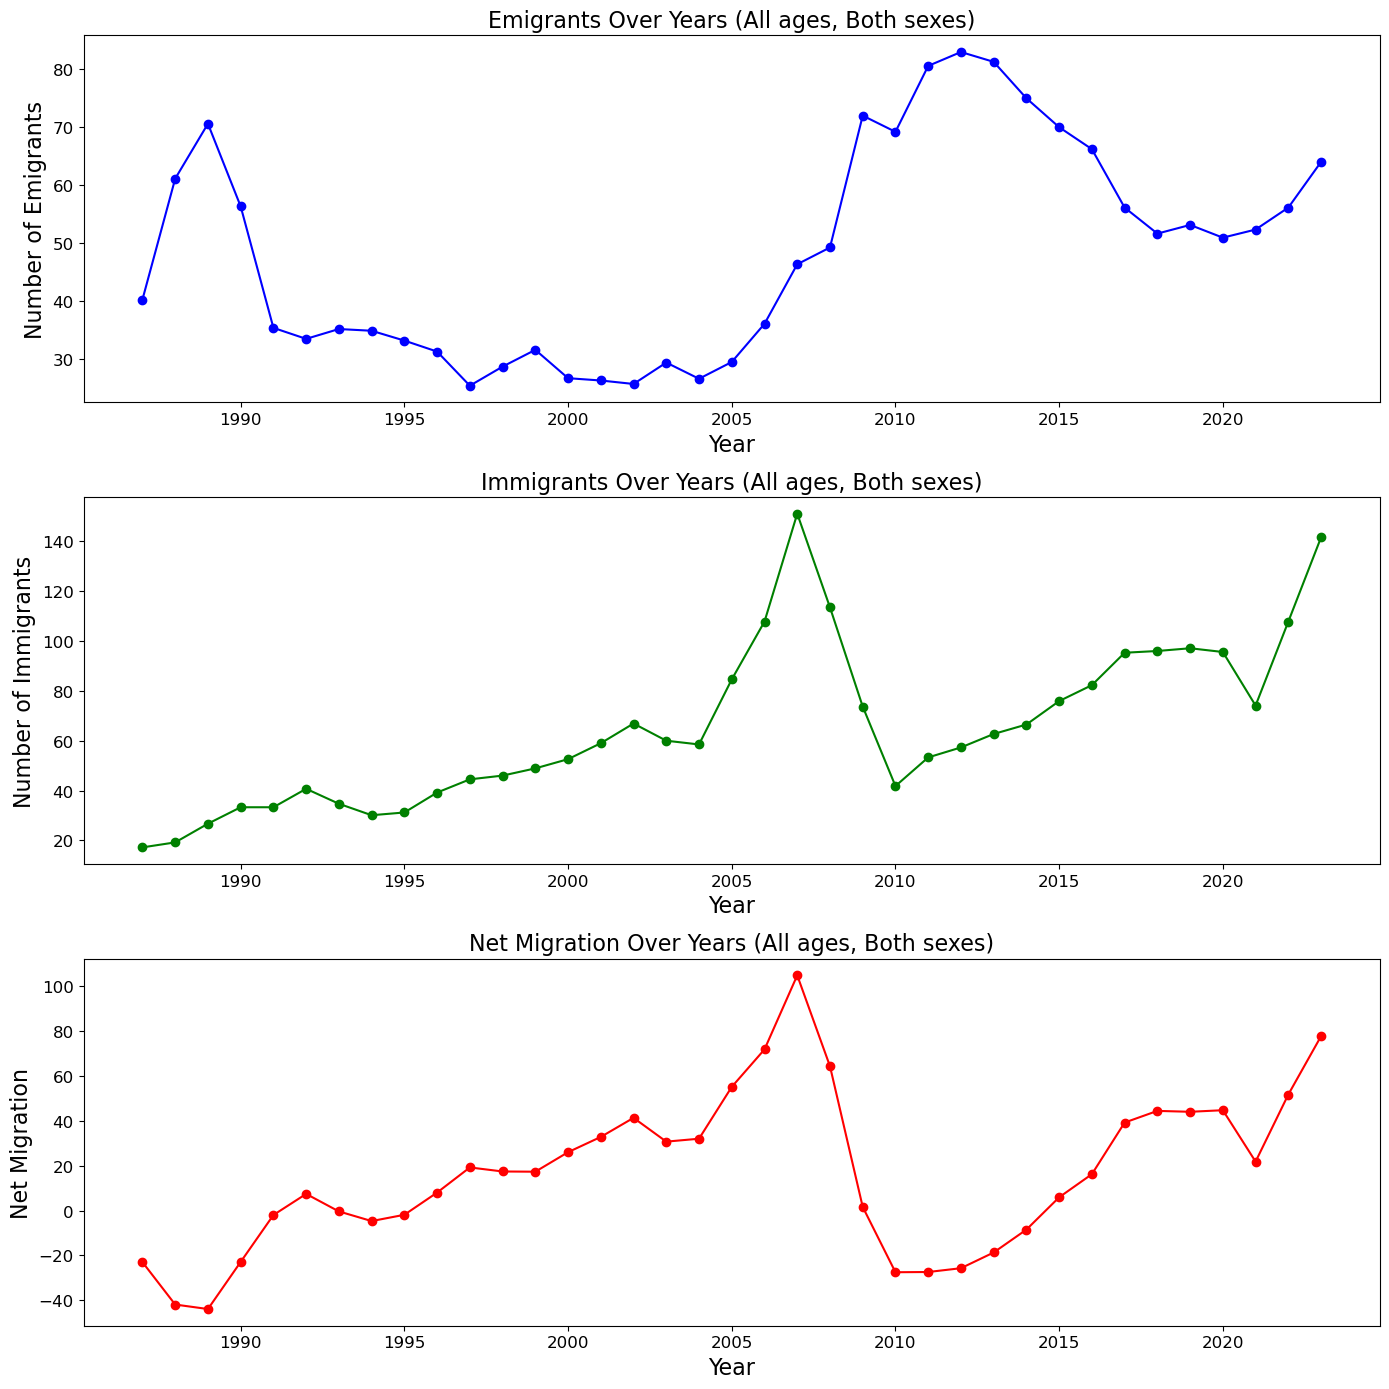

In [20]:
import matplotlib.pyplot as plt

# Filtering data for 'All ages' and 'Both sexes'
filtered_data = df_pivot[(df_pivot['age_group'] == 'All ages') & (df_pivot['sex'] == 'Both sexes')]

# Plotting
plt.figure(figsize=(14, 14))

# Emigrants plot
plt.subplot(3, 1, 1)
plt.plot(filtered_data['year'], filtered_data['emigrants'], color='blue', marker='o')
plt.title('Emigrants Over Years (All ages, Both sexes)')
plt.xlabel('Year')
plt.ylabel('Number of Emigrants')

# Immigrants plot
plt.subplot(3, 1, 2)
plt.plot(filtered_data['year'], filtered_data['immigrants'], color='green', marker='o')
plt.title('Immigrants Over Years (All ages, Both sexes)')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# Net Migration plot
plt.subplot(3, 1, 3)
plt.plot(filtered_data['year'], filtered_data['migration'], color='red', marker='o')
plt.title('Net Migration Over Years (All ages, Both sexes)')
plt.xlabel('Year')
plt.ylabel('Net Migration')

plt.tight_layout()
plt.show()


The Immigrants change in population over time since 2000.


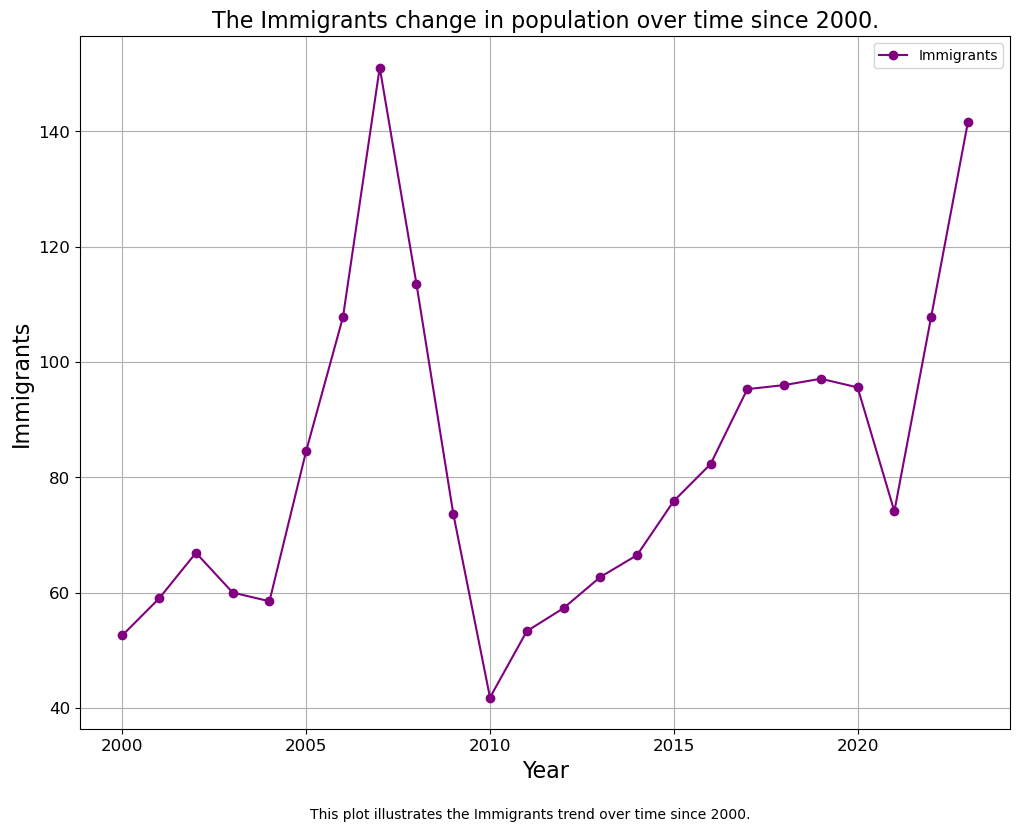

In [21]:
# Define the string and input date as per the provided style
string = 'immigrants'
input_date = 2000

# Filter the data for  years and for 'All ages' and 'Both sexes'
filtered_df = df_pivot[(df_pivot['year'] >= input_date) & (df_pivot['age_group'] == 'All ages') & (df_pivot['sex'] == 'Both sexes')]

# Create a figure with a specified size
plt.figure(figsize=(12, 9))

# Plot the data with markers and labels
plt.plot(filtered_df['year'], filtered_df[string], marker='o', label=string, color='purple')

# Set the title, axis labels, and legend
title = f'The {string.capitalize()} change in population over time since {input_date}.'
plt.title(title)
plt.xlabel('Year')
plt.ylabel(string.capitalize())

# Customize the legend label
plt.legend([string.capitalize()])

# Add a grid and a LaTeX-style caption with variables
plt.grid(True)
caption = f"This plot illustrates the {string.capitalize()} trend over time since {input_date}."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)

# Print the title as text to speed up report writing
print(title)

# Save the plot before displaying it
plt.savefig(f'PEA03immigrants_since_{input_date}.png')

# Display the plot
plt.show()



The Emigrants change in population over time since 2000.


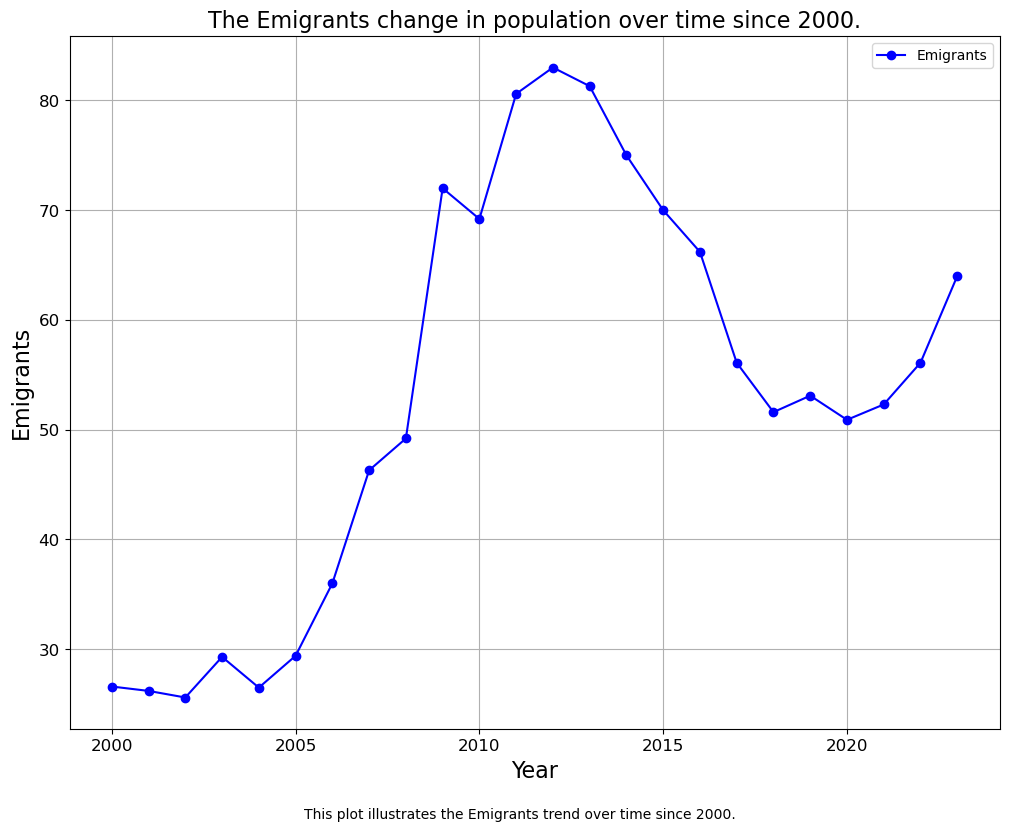

In [22]:
# emigrants	immigrants	migration

# Define the string and input date as per the provided style
string = 'emigrants'
input_date = 2000

# Filter the data for  years and for 'All ages' and 'Both sexes'
filtered_df = df_pivot[(df_pivot['year'] >= input_date) & (df_pivot['age_group'] == 'All ages') & (df_pivot['sex'] == 'Both sexes')]

# Create a figure with a specified size
plt.figure(figsize=(12, 9))

# Plot the data with markers and labels
plt.plot(filtered_df['year'], filtered_df[string], marker='o', label=string, color='blue')

# Set the title, axis labels, and legend
title = f'The {string.capitalize()} change in population over time since {input_date}.'
plt.title(title)
plt.xlabel('Year')
plt.ylabel(string.capitalize())

# Customize the legend label
plt.legend([string.capitalize()])

# Add a grid and a LaTeX-style caption with variables
plt.grid(True)
caption = f"This plot illustrates the {string.capitalize()} trend over time since {input_date}."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)

# Print the title as text to speed up report writing
print(title)

# Save the plot before displaying it
plt.savefig(f'PEA03immigrants_since_{input_date}.png')

# Display the plot
plt.show()


The Migration change in population over time since 2000.


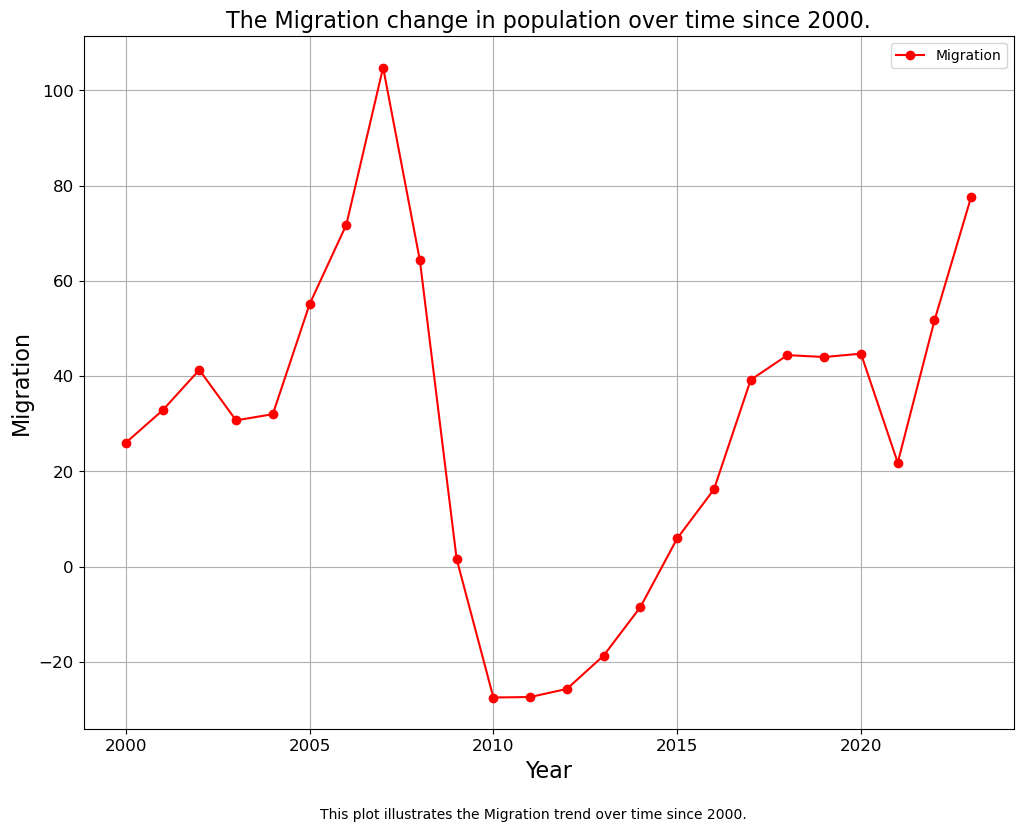

In [23]:
# emigrants	immigrants	migration

# Define the string and input date as per the provided style
string = 'migration'
input_date = 2000

# Filter the data for  years and for 'All ages' and 'Both sexes'
filtered_df = df_pivot[(df_pivot['year'] >= input_date) & (df_pivot['age_group'] == 'All ages') & (df_pivot['sex'] == 'Both sexes')]

# Create a figure with a specified size
plt.figure(figsize=(12, 9))

# Plot the data with markers and labels
plt.plot(filtered_df['year'], filtered_df[string], marker='o', label=string, color='red')

# Set the title, axis labels, and legend
title = f'The {string.capitalize()} change in population over time since {input_date}.'
plt.title(title)
plt.xlabel('Year')
plt.ylabel(string.capitalize())

# Customize the legend label
plt.legend([string.capitalize()])

# Add a grid and a LaTeX-style caption with variables
plt.grid(True)
caption = f"This plot illustrates the {string.capitalize()} trend over time since {input_date}."
plt.figtext(0.5, 0.01, caption, wrap=True, horizontalalignment='center', fontsize=10)

# Print the title as text to speed up report writing
print(title)

# Save the plot before displaying it
plt.savefig(f'PEA03immigrants_since_{input_date}.png')

# Display the plot
plt.show()

### Ongoing research
These mortality, fertility, and migration figures will be merged with population and other data from  [Central Statistics Office in Ireland  population of Ireland series.](https://data.cso.ie/product/pme)

In [24]:
# Save the clean DataFrame to a new CSV file
df_pivot.to_csv('../data/pivot03_migration_by_age.csv', index=False)

In [25]:
df_pivot

migration,year,age_group,sex,emigrants,immigrants,migration
0,1987,0 - 14 years,Both sexes,2.8,3.1,0.3
1,1987,0 - 14 years,Female,1.3,1.8,0.5
2,1987,0 - 14 years,Male,1.4,1.3,-0.1
3,1987,15 - 24 years,Both sexes,24.0,5.1,-18.9
4,1987,15 - 24 years,Female,11.7,3.2,-8.5
...,...,...,...,...,...,...
631,2023,65 years and over,Female,0.6,2.5,1.8
632,2023,65 years and over,Male,0.4,1.5,1.1
633,2023,All ages,Both sexes,64.0,141.6,77.7
634,2023,All ages,Female,32.9,75.5,42.6


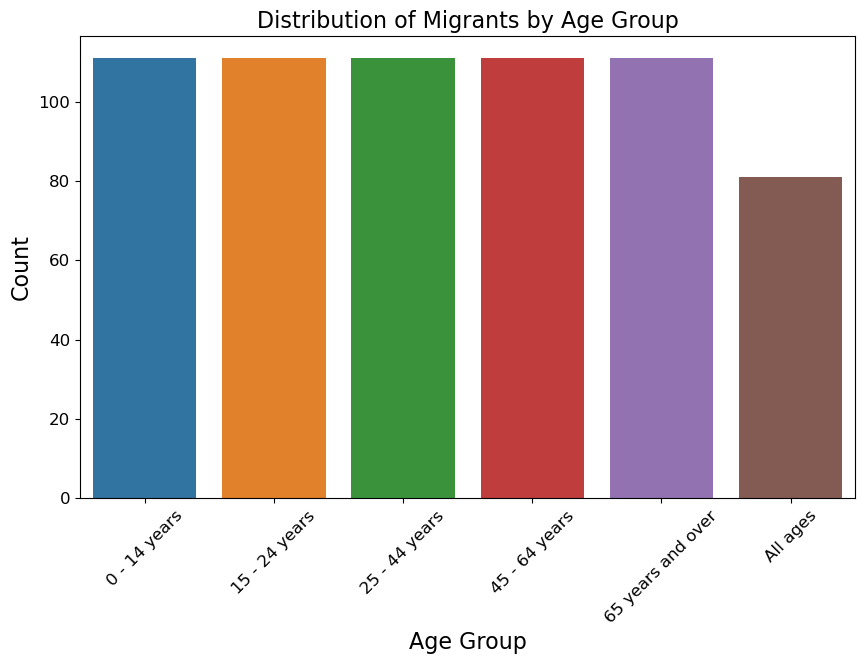

In [27]:
# Analyzing migration trends over time for each age group
migration_trends = # Analyzing migration trends over time for each age group
migration_trends = migration_df.groupby(['year', 'age_group']).sum().reset_index()

# Plotting trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=migration_trends, x='year', y='number_of_migrants', hue='age_group')
plt.title('Migration Trends Over Time by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Migrants')
plt.legend(title='Age Group')
plt.show()
.groupby(['year', 'age_group']).sum().reset_index()

# Plotting trends
plt.figure(figsize=(12, 8))
sns.lineplot(data=migration_trends, x='year', y='number_of_migrants', hue='age_group')
plt.title('Migration Trends Over Time by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Migrants')
plt.legend(title='Age Group')
plt.show()

